# Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
!pip install tensorflow-text
import tensorflow_text as text
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
! unzip /content/gdrive/MyDrive/Datasets/financial_sentiment_analysis.zip

Archive:  /content/gdrive/MyDrive/Datasets/financial_sentiment_analysis.zip
  inflating: data.csv                


In [4]:
df=pd.read_csv("/content/data.csv")

In [5]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [6]:
df.count()

Sentence     5842
Sentiment    5842
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

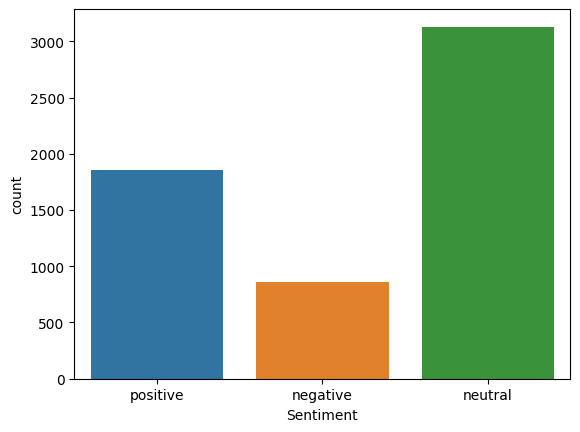

In [8]:
sns.countplot(x=df['Sentiment'])
plt.show

In [10]:
le = LabelEncoder()
df['Sentiment_encoded'] = le.fit_transform(df.Sentiment)
df.head()

,Sentence,Sentiment,Sentiment_encoded
0,The GeoSolutions technology will leverage Bene...,positive,2
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,0
2,"For the last quarter of 2010 , Componenta 's n...",positive,2
3,According to the Finnish-Russian Chamber of Co...,neutral,1
4,The Swedish buyout firm has sold its remaining...,neutral,1


In [11]:
encoder = OneHotEncoder(categories = 'auto')
X = encoder.fit_transform(
    df['Sentiment_encoded'].values.reshape(-1,1)).toarray()
dfonehot = pd.DataFrame(X)
df = pd.concat([df, dfonehot], axis =1)
df.columns = ['Sentence','Sentiment','Sentiment_encoded','negative','neutral','positive']


In [12]:
df.drop(columns=['Sentiment_encoded'],inplace=True)
df.drop(columns=['Sentiment'],inplace=True)
df

,Sentence,negative,neutral,positive
0,The GeoSolutions technology will leverage Bene...,0.0,0.0,1.0
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",1.0,0.0,0.0
2,"For the last quarter of 2010 , Componenta 's n...",0.0,0.0,1.0
3,According to the Finnish-Russian Chamber of Co...,0.0,1.0,0.0
4,The Swedish buyout firm has sold its remaining...,0.0,1.0,0.0
...,...,...,...,...
5837,RISING costs have forced packaging producer Hu...,1.0,0.0,0.0
5838,Nordic Walking was first used as a summer trai...,0.0,1.0,0.0
5839,"According shipping company Viking Line , the E...",0.0,1.0,0.0
5840,"In the building and home improvement trade , s...",0.0,1.0,0.0


In [13]:
X_train,X_test,y_train,y_test = train_test_split(df["Sentence"],df.iloc[:,1:],test_size = 0.4,
                                                 random_state = 42,shuffle = False)

In [14]:
#Create validation dataset from test dataset.
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size = 0.5,random_state = 42,shuffle = False)

In [15]:
#You can pick your BERT MODEL from tensorflow hub.
tfhub_handle_encoder = "https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/2"
tfhub_handle_preprocess = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/2
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 108.4 MB/s eta 0:00:00


In [17]:

text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
preprocessor = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder_inputs = preprocessor(text_input)

In [18]:
idx = X_train.index[10]
ex = [X_train[idx]]
ex_preprocessed = preprocessor(ex)
print(f"Sentence : {ex}")
print(f'Keys       : {list(ex_preprocessed.keys())}')
print(f'Shape      : {ex_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {ex_preprocessed["input_word_ids"][0, :20]}')
print(f'Input Mask : {ex_preprocessed["input_mask"][0, :20]}')
print(f'Type Ids   : {ex_preprocessed["input_type_ids"][0, :20]}')

Sentence : ['Circulation revenue has increased by 5 % in Finland and 4 % in Sweden in 2008 .']
Keys       : ['input_type_ids', 'input_mask', 'input_word_ids']
Shape      : (1, 128)
Word Ids   : [ 101 9141 6599 2038 3445 2011 1019 1003 1999 6435 1998 1018 1003 1999
 4701 1999 2263 1012  102    0]
Input Mask : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


['Circulation revenue has increased by 5 % in Finland and 4 % in Sweden in 2008 .']

In [19]:
def build_classifier_model():
    #Get text input and preprocess it.
    text_input = tf.keras.layers.Input(shape = (),dtype = tf.string,name = "text")
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess,name = "preprocessing")
    encoder_inputs = preprocessing_layer(text_input)
    #Use encoder to apply BERT MODEL.
    encoder = hub.KerasLayer(tfhub_handle_encoder,trainable = True,name = "BERT_encoder")
    outputs = encoder(encoder_inputs)
    #You can think of a pooled_output as a embedding for the entire movie_review.
    net = outputs["pooled_output"]
    #Droupout and output layers.
    net = tf.keras.layers.Dropout(0.3)(net)
    net = tf.keras.layers.Dense(3,activation = "softmax",name = "classifier")(net)
    return tf.keras.Model(text_input,net)

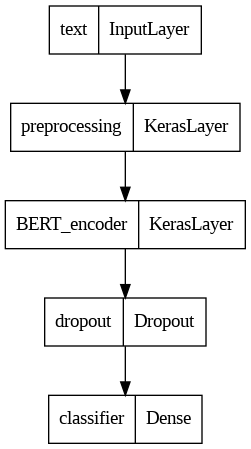

In [20]:
#Assign classifer model see the model on graph.
model = build_classifier_model()
tf.keras.utils.plot_model(model)

In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [22]:
#Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
#Compile the model
model.compile(optimizer = optimizer,loss = "categorical_crossentropy",metrics = "accuracy")

In [23]:
#Callbacks
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = "val_loss",patience = 4);

0       The GeoSolutions technology will leverage Bene...
1       $ESI on lows, down $1.50 to $2.50 BK a real po...
2       For the last quarter of 2010 , Componenta 's n...
3       According to the Finnish-Russian Chamber of Co...
4       The Swedish buyout firm has sold its remaining...
                              ...                        
3500    The company has also supplied more than 200 MW...
3501    In addition to fireplace exports , demand for ...
3502    Companies Thetrainline.com announces arrival o...
3503    A Flurry Analytics spokesperson said that , as...
3504    Pharmaceuticals - Italy This brand-new market ...
Name: Sentence, Length: 3505, dtype: object

In [47]:
print(f"Training model : {tfhub_handle_encoder}")
history = model.fit(x = X_train,y = y_train,validation_data = (X_val,y_val),epochs = 15,batch_size = 32,
                   callbacks = [es])


Training model : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/2
Epoch 1/15
110/110 [==============================] - 63s 575ms/step - loss: 1.0154 - accuracy: 0.5213 - val_loss: 1.0060 - val_accuracy: 0.5252
Epoch 2/15
110/110 [==============================] - 57s 523ms/step - loss: 1.0041 - accuracy: 0.5270 - val_loss: 1.0068 - val_accuracy: 0.5252
Epoch 3/15
110/110 [==============================] - 58s 526ms/step - loss: 1.0068 - accuracy: 0.5213 - val_loss: 0.9972 - val_accuracy: 0.5252
Epoch 4/15
110/110 [==============================] - 57s 522ms/step - loss: 0.9987 - accuracy: 0.5304 - val_loss: 0.9953 - val_accuracy: 0.5252
Epoch 5/15
110/110 [==============================] - 58s 528ms/step - loss: 1.0013 - accuracy: 0.5310 - val_loss: 1.0165 - val_accuracy: 0.5252
Epoch 6/15
110/110 [==============================] - 57s 516ms/step - loss: 0.9962 - accuracy: 0.5318 - val_loss: 0.9995 - val_accuracy: 0.5252
Epoch 7/15
110/110 [====================

In [48]:
loss,accuracy = model.evaluate(X_test,y_test)
print(f"Loss : {loss} , acc : {accuracy}")

37/37 [==============================] - 7s 187ms/step - loss: 0.9899 - accuracy: 0.5214
Loss : 0.9898909330368042 , acc : 0.5214040875434875


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


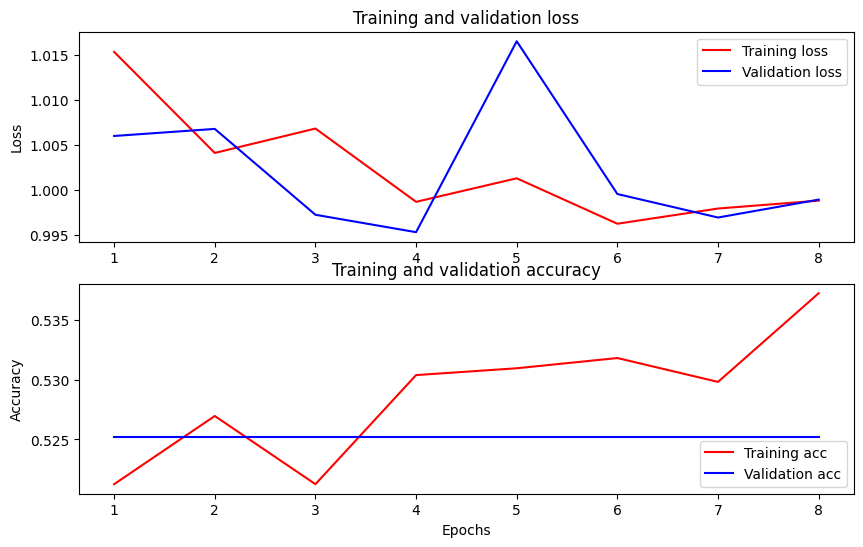

In [49]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [50]:
model.save("financial_sentiment_BERT")

In [51]:
model_saved = tf.saved_model.load("financial_sentiment_BERT")

In [52]:
data=["The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .","Viking Line has canceled some services ."]

In [59]:
#(2) You can write your own sentence and predict its sentiment.
own_pred = model.predict(data)
classes = le.classes_
print(own_pred)
pred_index = np.argmax(own_pred,axis = 1)
print(classes[pred_index])

1/1 [==============================] - 0s 71ms/step
[[0.13001484 0.567847   0.30213818]
 [0.1300149  0.56784666 0.30213842]]
['neutral' 'neutral']
